<a href="https://colab.research.google.com/github/gsnsg/DL_Notebooks/blob/main/HW_2_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Mounting GDrive


In [1]:
from google.colab import drive

drive.mount('/content/gdrive')



Mounted at /content/gdrive


##Data Visualization and Transformations


In [22]:
import pandas as pd

csv_url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"

raw_dataset = pd.read_csv(csv_url,
                          na_values='?', comment='\t',
                          sep=',', skipinitialspace=True)

In [23]:
dataset = raw_dataset.copy()
dataset.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [24]:
dataset.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [25]:
# remove NaN values
dataset = dataset.dropna()
dataset.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [26]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
dataset['latitude'].dtype

dtype('float64')

In [8]:
dataset = pd.get_dummies(data = dataset, columns= ['ocean_proximity'], prefix = ['ocean_proximity'], drop_first = True)

In [9]:
input_data = dataset.drop(columns = ["median_house_value"])
output_data = dataset.pop("median_house_value")


In [10]:
input_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,1,0


In [11]:
# normalize input data columns
input_data = (input_data - input_data.mean())/input_data.std()

In [12]:
# check if there are any NaN values
input_data.isna().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(input_data, output_data, test_size = 0.25)


In [14]:
print(X_train.shape, X_test.shape)

(15324, 12) (5109, 12)


### Model Creation and Helper methods

In [32]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

np_train_data = np.array(X_train)

normalizer = tf.keras.layers.Normalization(input_shape = [12,], axis = None)
normalizer.adapt(np_train_data)

# (n, 28, 28, 1) -> (n, 28 * 28)
def make_model(model_name, hidden_layers):
  layers = [normalizer, tf.keras.layers.Dense(12)] + hidden_layers + [tf.keras.layers.Dense(1)]
  model = tf.keras.models.Sequential(layers, name=model_name)
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                loss='mae')
  return model

In [33]:
IMG_PATH = "/content/gdrive/MyDrive/Images/HW_2/"

def plot_and_save(model_name, history, img_path = IMG_PATH):

  plt.clf()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(model_name + "_Loss")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc = 'center right')
  plt.savefig(f"{img_path}/{model_name}_Loss.png")
  

In [30]:
def train_and_evaluate(model, epochs = 100, img_save_path = IMG_PATH):
  print(f"\nStarted training {model.name}")
  history = model.fit(X_train, Y_train, batch_size = 32, validation_split = 0.2, epochs = epochs, verbose = 2)
  predicted_vals = model.predict(X_test)
  plot_and_save(model.name, history, img_path = img_save_path)
  return tf.keras.losses.MeanAbsoluteError()(Y_test, predicted_vals)

## 1. Fixing Number of Hidden Units in each layer and varying number of Hidden Layers

For this experiment let us fix the number of units in each hidden layer to be **16** 

We are building different models with a Normalization input layer and 1 unit Dense Output Layer and variable number of  hidden layers (1-3)

In [ ]:
HIDDEN_LAYER_UNITS = 16

layers_arr = []
for layer_cnt in range(1, 4):
  tmp_arr = []
  for i in range(layer_cnt):
    tmp_arr.append(tf.keras.layers.Dense(HIDDEN_LAYER_UNITS, activation="relu"))
  layers_arr.append(tmp_arr)


model_names = [f"Fixed_Units_{HIDDEN_LAYER_UNITS}_Model_With_{i}_Hidden_Layers" for i in range(1, 4)]
models = [ make_model(model_names[i], layers_arr[i]) for i in range(0, 3)]

results = []
for model in models:
  results.append(train_and_evaluate(model))


In [23]:
for name, tup in zip(model_names, results):
  print(name, ", Test Accuracy: ", tup)

Fixed_Units_16_Model_With_1_Hidden_Layers , Test Accuracy:  tf.Tensor(116691.72, shape=(), dtype=float32)
Fixed_Units_16_Model_With_2_Hidden_Layers , Test Accuracy:  tf.Tensor(115832.305, shape=(), dtype=float32)
Fixed_Units_16_Model_With_3_Hidden_Layers , Test Accuracy:  tf.Tensor(119907.69, shape=(), dtype=float32)


## 2. Fixing Number of Number of Hidden Layers

For this experiment let us fix the number of hidden layers to be **3** 

We are building different models with a Flatten input layer and 1 unit Dense Output Layer and 3 hidden layers with varying neurons per layer


Started training Fixed_Hidden_Layers_Model_With_2_Hidden_Units
Epoch 1/100
384/384 - 1s - loss: 176262.4062 - val_loss: 121822.1094 - 1s/epoch - 3ms/step
Epoch 2/100
384/384 - 1s - loss: 99152.0781 - val_loss: 72131.0859 - 628ms/epoch - 2ms/step
Epoch 3/100
384/384 - 1s - loss: 52927.8477 - val_loss: 49424.3984 - 565ms/epoch - 1ms/step
Epoch 4/100
384/384 - 1s - loss: 49525.8008 - val_loss: 48734.5469 - 621ms/epoch - 2ms/step
Epoch 5/100
384/384 - 1s - loss: 49105.8086 - val_loss: 48377.6992 - 619ms/epoch - 2ms/step
Epoch 6/100
384/384 - 1s - loss: 48770.0039 - val_loss: 48741.2188 - 604ms/epoch - 2ms/step
Epoch 7/100
384/384 - 1s - loss: 48634.7383 - val_loss: 48433.7227 - 613ms/epoch - 2ms/step
Epoch 8/100
384/384 - 1s - loss: 48570.8281 - val_loss: 47611.6250 - 556ms/epoch - 1ms/step
Epoch 9/100
384/384 - 1s - loss: 48512.5430 - val_loss: 48015.9258 - 623ms/epoch - 2ms/step
Epoch 10/100
384/384 - 1s - loss: 48470.4023 - val_loss: 47655.0586 - 616ms/epoch - 2ms/step
Epoch 11/100
384

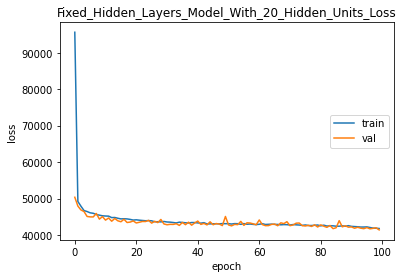

In [31]:
NUM_HIDDEN_LAYERS = 3


num_neurons = [2 * i for i in range(1, 11)]
names = [f"Fixed_Hidden_Layers_Model_With_{2 * i}_Hidden_Units" for i in range(1, 11)]

models = []
for neurons, model_name in zip(num_neurons, names):
  layers = []
  for layer in range(NUM_HIDDEN_LAYERS):
    layers.append(tf.keras.layers.Dense(neurons, activation="relu"))
  
  models.append(make_model(model_name, layers))


results = []
for model in models:
  results.append(train_and_evaluate(model, 100, IMG_PATH + "Part2/"))

In [33]:
for name, tup in zip(names, results):
  print(name, ", Test Accuracy: ", tup)

Fixed_Hidden_Layers_Model_With_2_Hidden_Units , Test Accuracy:  tf.Tensor(115812.125, shape=(), dtype=float32)
Fixed_Hidden_Layers_Model_With_4_Hidden_Units , Test Accuracy:  tf.Tensor(116283.805, shape=(), dtype=float32)
Fixed_Hidden_Layers_Model_With_6_Hidden_Units , Test Accuracy:  tf.Tensor(117182.63, shape=(), dtype=float32)
Fixed_Hidden_Layers_Model_With_8_Hidden_Units , Test Accuracy:  tf.Tensor(117396.555, shape=(), dtype=float32)
Fixed_Hidden_Layers_Model_With_10_Hidden_Units , Test Accuracy:  tf.Tensor(119924.17, shape=(), dtype=float32)
Fixed_Hidden_Layers_Model_With_12_Hidden_Units , Test Accuracy:  tf.Tensor(114896.6, shape=(), dtype=float32)
Fixed_Hidden_Layers_Model_With_14_Hidden_Units , Test Accuracy:  tf.Tensor(118121.5, shape=(), dtype=float32)
Fixed_Hidden_Layers_Model_With_16_Hidden_Units , Test Accuracy:  tf.Tensor(119627.164, shape=(), dtype=float32)
Fixed_Hidden_Layers_Model_With_18_Hidden_Units , Test Accuracy:  tf.Tensor(121058.164, shape=(), dtype=float32)
Fi